### Import required libraries

In [ ]:
require 'nn';
require 'cudnn';
require 'cunn';

### Set the GPU number (>0)

In [2]:
cutorch.setDevice(1);

### Load the trainined model

In [3]:
net = torch.load("checkpoints/regression/net.t7")
net:evaluate()

## Sample Data and it's steering angles


* center/1475187670708132657.png 0.0244346093386
* center/1475187624602002305.png 0.017488199193
* center/1475187429924572147.png 0.118682391942
* center/1475187596947995908.png 0.0324282180518
* center/1475187051021686303.png 0.00349065847695

### Data preprocessing

In [1]:
path = "/do_not_store/ananth/dataset/train/" .. "center/1475187051021686303.png"
img = image.load(path,3,float)

input = image.scale(img, 224, 224)

mean = {-0.083300798050439,-0.10651495109198,-0.17295466315224}
for c=1,3 do
    input[{ c, {}, {} }]:add(-mean[c])
end

path = "/do_not_store/ananth/dataset/train/" .. "center/1475187624602002305.png"
img = image.load(path,3,float)

input1 = image.scale(img, 224, 224)

mean = {-0.083300798050439,-0.10651495109198,-0.17295466315224}
for c=1,3 do
    input1[{ c, {}, {} }]:add(-mean[c])
end

net:cuda();
net:evaluate();
ii = torch.CudaTensor(2,3,224,224)
ii[1] = input
ii[2] = input1

label = torch.CudaTensor(2,1)
label[1] = 0.00349065847695
label[2] = 0.017488199193

### Model Forward

In [2]:
output = net:forward(ii)

model = nn.CosineDistance()
model:cuda()

angle = model:forward{output, label:cuda()}

### Look at the angles

In [74]:
angle

-1.0000
 1.0000
[torch.CudaTensor of size 2]



### Model layers and it's specifications

In [95]:
net

nn.Sequential {
  [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> (7) -> (8) -> (9) -> (10) -> (11) -> (12) -> (13) -> (14) -> (15) -> (16) -> (17) -> (18) -> (19) -> (20) -> (21) -> (22) -> (23) -> (24) -> (25) -> (26) -> (27) -> (28) -> output]
  (1): cudnn.SpatialConvolution(3 -> 96, 11x11, 4,4, 2,2)
  (2): cudnn.SpatialBatchNormalization
  (3): cudnn.ReLU
  (4): cudnn.SpatialMaxPooling(3x3, 2,2)
  (5): cudnn.SpatialConvolution(96 -> 256, 5x5, 1,1, 2,2)
  (6): cudnn.SpatialBatchNormalization
  (7): cudnn.ReLU
  (8): cudnn.SpatialMaxPooling(3x3, 2,2)
  (9): cudnn.SpatialConvolution(256 -> 384, 3x3, 1,1, 1,1)
  (10): cudnn.SpatialBatchNormalization
  (11): cudnn.ReLU
  (12): cudnn.SpatialConvolution(384 -> 256, 3x3, 1,1, 1,1)
  (13): cudnn.SpatialBatchNormalization
  (14): cudnn.ReLU
  (15): cudnn.SpatialConvolution(256 -> 256, 3x3, 1,1, 1,1)
  (16): cudnn.SpatialBatchNormalization
  (17): cudnn.ReLU
  (18): cudnn.SpatialMaxPooling(3x3, 2,2)
  (19): nn.View(9216)
  (20): nn.Linear

          output_slice : CudaTensor - size: 2x96x55x55
          dW : 4
          oDescForBias : cdata<struct cudnnTensorStruct *[1]>: 0x4113eb78
          kW : 11
          kH : 11
          weight_offset : 34848
          oSize : LongStorage - size: 4
          input_slice : CudaTensor - size: 2x3x224x224
          oDesc : cdata<struct cudnnTensorStruct *[1]>: 0x41a9ec40
          train : false
          dH : 4
          output_offset : 290400
          weight : CudaTensor - size: 96x3x11x11
          padH : 2
          weightDesc : cdata<struct cudnnFilterStruct *[?]>: 0x415b4258
        }
      2 : 
        cudnn.SpatialBatchNormalization
        {
          output : CudaTensor - size: 2x96x55x55
          gradInput : CudaTensor - empty
          iSize : LongStorage - size: 4
          save_mean : CudaTensor - size: 96
          affine : true
          scaleT : CudaTensor - size: 1
          sDesc : cdata<struct cudnnTensorStruct *[1]>: 0x41b68f20
          gradBias : CudaTensor - 

          output : CudaTensor - size: 2x96x27x27
          gradInput : CudaTensor - empty
          iSize : LongStorage - size: 4
          indices : CudaTensor - empty
          poolDesc : cdata<struct cudnnPoolingStruct *[1]>: 0x414c0318
          dH : 2
          dW : 2
          kW : 3
          kH : 3
          iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x40497fa8
          mode : CUDNN_POOLING_MAX
          train : false
          ceil_mode : false
          oDesc : cdata<struct cudnnTensorStruct *[1]>: 0x4192d2b8
          padH : 0
          _type : torch.CudaTensor
        }
      5 : 
        cudnn.SpatialConvolution(96 -> 256, 5x5, 1,1, 2,2)
        {
          padW : 2
          pad : 
            {
              1 : 2
              2 : 2
            }
          nInputPlane : 96
          output : CudaTensor - size: 2x256x27x27
          iSize : LongStorage - size: 4
          convDesc : cdata<struct cudnnConvolutionStruct *[?]>: 0x41077a68
          stride : 
           

          output : CudaTensor - size: 2x256x27x27
          gradInput : CudaTensor - empty
          iSize : LongStorage - size: 4
          save_mean : CudaTensor - size: 256
          affine : true
          scaleT : CudaTensor - size: 1
          sDesc : cdata<struct cudnnTensorStruct *[1]>: 0x41acd600
          gradBias : CudaTensor - size: 256
          bias : CudaTensor - size: 256
          oDesc : cdata<struct cudnnTensorStruct *[1]>: 0x416cc858
          running_var : CudaTensor - size: 256
          momentum : 0.1
          iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x41ae76e0
          eps : 1e-05
          train : false
          gradWeight : CudaTensor - size: 256
          running_mean : CudaTensor - size: 256
          _type : torch.CudaTensor
          save_std : CudaTensor - size: 256
          weight : CudaTensor - size: 256
        }
      7 : 
        cudnn.ReLU
        {
          threshold : 0
          output : CudaTensor - size: 2x256x27x27
          gradInpu

         nInputPlane : 256
          output : CudaTensor - size: 2x384x13x13
          iSize : LongStorage - size: 4
          convDesc : cdata<struct cudnnConvolutionStruct *[?]>: 0x416513b8
          stride : 
            {
              1 : 1
              2 : 1
            }
          groups : 1
          gradBias : CudaTensor - size: 384
          nOutputPlane : 384
          bias : CudaTensor - size: 384
          iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x41c92298
          input_offset : 43264
          gradWeight : CudaTensor - size: 384x256x3x3
          autotunerHash : -dimA2,256,13,13 -filtA384,256,3,3 2,384,13,13 -padA1,1 -convStrideA1,1 CUDNN_DATA_FLOAT
          biasDesc : cdata<struct cudnnTensorStruct *[1]>: 0x417a2c38
          gradInput : CudaTensor - empty
          _type : torch.CudaTensor
          output_slice : CudaTensor - size: 2x384x13x13
          dW : 1
          oDescForBias : cdata<struct cudnnTensorStruct *[1]>: 0x41d946d8
          kW : 3
         

        threshold : 0
          output : CudaTensor - size: 2x384x13x13
          gradInput : CudaTensor - empty
          iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x4048c258
          inplace : true
          mode : CUDNN_ACTIVATION_RELU
          _type : torch.CudaTensor
          activDesc : cdata<struct cudnnActivationStruct *[1]>: 0x41daf328
          nElem : 129792
          train : false
          val : 0
        }
      12 : 
        cudnn.SpatialConvolution(384 -> 256, 3x3, 1,1, 1,1)
        {
          padW : 1
          pad : 
            {
              1 : 1
              2 : 1
            }
          nInputPlane : 384
          output : CudaTensor - size: 2x256x13x13
          iSize : LongStorage - size: 4
          convDesc : cdata<struct cudnnConvolutionStruct *[?]>: 0x41b7efa8
          stride : 
            {
              1 : 1
              2 : 1
            }
          groups : 1
          gradBias : CudaTensor - size: 256
          nOutputPlane : 256
        

          save_mean : CudaTensor - size: 256
          affine : true
          scaleT : CudaTensor - size: 1
          sDesc : cdata<struct cudnnTensorStruct *[1]>: 0x41a9f400
          gradBias : CudaTensor - size: 256
          bias : CudaTensor - size: 256
          oDesc : cdata<struct cudnnTensorStruct *[1]>: 0x41add150
          running_var : CudaTensor - size: 256
          momentum : 0.1
          iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x41dc0b88
          eps : 1e-05
          train : false
          gradWeight : CudaTensor - size: 256
          running_mean : CudaTensor - size: 256
          _type : torch.CudaTensor
          save_std : CudaTensor - size: 256
          weight : CudaTensor - size: 256
        }
      14 : 
        cudnn.ReLU
        {
          threshold : 0
          output : CudaTensor - size: 2x256x13x13
          gradInput : CudaTensor - empty
          iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x415c4498
          inplace : true
          mode 

      autotunerHash : -dimA2,256,13,13 -filtA256,256,3,3 2,256,13,13 -padA1,1 -convStrideA1,1 CUDNN_DATA_FLOAT
          biasDesc : cdata<struct cudnnTensorStruct *[1]>: 0x4064f1f8
          gradInput : CudaTensor - empty
          _type : torch.CudaTensor
          output_slice : CudaTensor - size: 2x256x13x13
          dW : 1
          oDescForBias : cdata<struct cudnnTensorStruct *[1]>: 0x41262050
          kW : 3
          kH : 3
          weight_offset : 589824
          oSize : LongStorage - size: 4
          input_slice : CudaTensor - size: 2x256x13x13
          oDesc : cdata<struct cudnnTensorStruct *[1]>: 0x41085990
          train : false
          dH : 1
          output_offset : 43264
          weight : CudaTensor - size: 256x256x3x3
          padH : 1
          weightDesc : cdata<struct cudnnFilterStruct *[?]>: 0x4125da80
        }
      16 : 
        cudnn.SpatialBatchNormalization
        {
          output : CudaTensor - size: 2x256x13x13
          gradInput : CudaTenso

          output : CudaTensor - size: 2x256x6x6
          gradInput : CudaTensor - empty
          iSize : LongStorage - size: 4
          indices : CudaTensor - empty
          poolDesc : cdata<struct cudnnPoolingStruct *[1]>: 0x415c59e8
          dH : 2
          dW : 2
          kW : 3
          kH : 3
          iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x415c5d58
          mode : CUDNN_POOLING_MAX
          train : false
          ceil_mode : false
          oDesc : cdata<struct cudnnTensorStruct *[1]>: 0x41db0d38
          padH : 0
          _type : torch.CudaTensor
        }
      19 : 
        nn.View(9216)
        {
          _type : torch.CudaTensor
          output : CudaTensor - size: 2x9216
          gradInput : CudaTensor - empty
          size : LongStorage - size: 1
          train : false
          numElements : 9216
        }
      20 : 
        nn.Linear(9216 -> 4096)
        {
          gradBias : CudaTensor - size: 4096
          output : CudaTensor - size: 2x40

}
      22 : 
        cudnn.ReLU
        {
          threshold : 0
          output : CudaTensor - size: 2x4096
          gradInput : CudaTensor - empty
          iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x41015ac8
          inplace : false
          mode : CUDNN_ACTIVATION_RELU
          _type : torch.CudaTensor
          activDesc : cdata<struct cudnnActivationStruct *[1]>: 0x410157f0
          nElem : 8192
          train : false
          val : 0
        }
      23 : 
        nn.Dropout(0.500000)
        {
          v2 : true
          noise : CudaTensor - empty
          _type : torch.CudaTensor
          p : 0.5
          gradInput : CudaTensor - empty
          stochastic_inference : false
          output : CudaTensor - size: 2x4096
          train : false
        }
      24 : 
        nn.Linear(4096 -> 4096)
        {
          gradBias : CudaTensor - size: 4096
          output : CudaTensor - size: 2x4096
          gradInput : CudaTensor - empty
          weight : CudaTe

        }
      26 : 
        cudnn.ReLU
        {
          threshold : 0
          output : CudaTensor - size: 2x4096
          gradInput : CudaTensor - empty
          iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x408d7de8
          inplace : false
          mode : CUDNN_ACTIVATION_RELU
          _type : torch.CudaTensor
          activDesc : cdata<struct cudnnActivationStruct *[1]>: 0x41b57ed8
          nElem : 8192
          train : false
          val : 0
        }
      27 : 
        nn.Dropout(0.500000)
        {
          v2 : true
          noise : CudaTensor - empty
          _type : torch.CudaTensor
          p : 0.5
          gradInput : CudaTensor - empty
          stochastic_inference : false
          output : CudaTensor - size: 2x4096
          train : false
        }
      28 : 
        nn.Linear(4096 -> 1)
        {
          gradBias : CudaTensor - size: 1
          output : CudaTensor - size: 2x1
          gradInput : CudaTensor - empty
          weight : CudaTen

### Display Layer Activations by changing the layer number

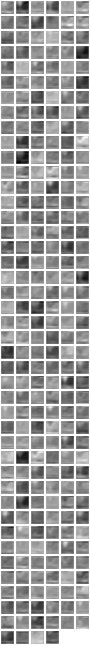

In [11]:
layer = 12 -- must be all the spatial convolution layer
itorch.image(net:get(layer).output[1])